# K-MEANS ANALYSIS

### Elbow Curve Method

In [225]:
import os
os.chdir("..")
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder,KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import pairwise_distances_argmin_min
import seaborn as sb
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNESNE
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from kneed import KneeLocator
import sys, os
import re
os.getcwd()

'/'

In [20]:
%reload_ext autoreload
%autoreload 
from funcs_utils import *

Lectura de datos filtrados:

In [346]:
df25= pd.read_csv('/content/df_d25.csv') 
df20= pd.read_csv('/content/df_d20.csv') 
df15= pd.read_csv('/content/df_d15.csv')
df10= pd.read_csv('/content/df_d10.csv')
df5= pd.read_csv('/content/df_d5.csv')

In [318]:
df25.head(3)

history_id_crm  p5_5_1  p5_5_2  p5_5_3  p5_5_4  p5_5_5  p5_5_NULO  p5_1_1  \
0         7521766       0       0       0       1       0          0       0   
1         7544090       0       0       1       0       0          0       0   
2         7543953       0       0       0       1       0          0       0   

   p5_1_2  p5_1_3  p5_1_4  p5_1_5  p5_1_NULO  p5_2_1  p5_2_2  p5_2_3  \
0       1       0       0       0          0       0       1       0   
1       0       1       0       0          0       0       0       1   
2       0       0       1       0          0       0       1       0   

   p5_2_NULO  p2_45_none_1  p2_45_none_2  p2_45_none_3  p2_45_none_4  \
0          0             0             0             0             0   
1          0             0             0             0             0   
2          0             0             0             0             0   

   p2_45_none_5  p2_45_none_6  p2_45_none_NULO  p3_12_1  p3_12_2  p3_12_3  \
0             0             0                1        0        0        1   
1             0             1                0        0        0        0   
2             0             1                0        0        0        1   

   p3_12_NULO  p2_14_1  p2_14_2  p2_14_3  p2_14_NULO  p2_44_none_1  \
0           0        1        0        0           0             0   
1           1        1        0        0           0             0   
2           0        0        0        1           0             0   

   p2_44_none_2  p2_44_none_3  p2_44_none_4  p2_44_none_5  p2_44_none_6  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             1   

   p2_44_none_NULO  p2_34_b_1  p2_34_b_2  p2_34_b_3  p2_34_b_97  p2_34_b_NULO  \
0                1          1          0          0           0             0   
1                0          0          1          0           0             0   
2                0          0          1          0           0             0   

   p2_34_e_1  p2_34_e_2  p2_34_e_3  p2_34_e_97  p2_34_e_NULO  p3_8_1  ...  \
0          1          0          0           0             0       0  ...   
1          1          0          0           0             0       0  ...   
2          0          1          0           0             0       0  ...   

   p2_15_2  p2_15_NULO  p2_46_1  p2_46_2  p2_46_NULO  p1_2_1  p1_2_2  p1_2_3  \
0        0           0        0        1           0       0       1       0   
1        1           0        0        1           0       0       0       0   
2        0           0        0        1           0       0       0       1   

   p1_2_4  p1_2_5  p1_2_6  p1_2_NULO  p1_4_1  p1_4_2  p1_4_3  p1_4_4  p1_4_5  \
0       0       0       0          0       0       0       0       1       0   
1       1       0       0          0       0       0       1       0       0   
2       0       0       0          0       1       0       0       0       0   

   p1_4_6  p1_4_7  p1_4_8  p1_4_9  p1_4_NULO  p6_1_1  p6_1_2  p6_1_NULO  \
0       0       0       0       0          0       1       0          0   
1       0       0       0       0          0       1       0          0   
2       0       0       0       0          0       0       1          0   

   p3_13_1  p3_13_2  p3_13_NULO  estrato_nuevo_1  estrato_nuevo_2  \
0        1        0           0                1                0   
1        1        0           0                1                0   
2        0        1           0                1                0   

   estrato_nuevo_3  levantamiento_1Q2021  levantamiento_1Q2022  \
0                0                     1                     0   
1                0                     1                     0   
2                0                     1                     0   

   levantamiento_2Q2021  levantamiento_3Q2021  levantamiento_4Q2020  \
0                     0

In [319]:
print(df25.shape)
print(df20.shape)
print(df15.shape)
print(df10.shape)
print(df5.shape)

(11952, 253)
(11952, 230)
(11952, 176)
(11952, 165)
(11952, 97)


Quitamos el outlier:

In [347]:
df25.drop(df25.loc[df25['history_id_crm']==223948618].index, inplace=True)
df20.drop(df20.loc[df20['history_id_crm']==223948618].index, inplace=True)
df15.drop(df15.loc[df15['history_id_crm']==223948618].index, inplace=True)
df10.drop(df10.loc[df10['history_id_crm']==223948618].index, inplace=True)
df5.drop(df5.loc[df5['history_id_crm']==223948618].index, inplace=True)

In [348]:
df25=df25.drop(['history_id_crm'], axis=1)
df20=df20.drop(['history_id_crm'], axis=1)
df15=df15.drop(['history_id_crm'], axis=1)
df10=df10.drop(['history_id_crm'], axis=1)
df5=df5.drop(['history_id_crm'], axis=1)

In [349]:
print(df25.shape)
print(df20.shape)
print(df15.shape)
print(df10.shape)
print(df5.shape)

(11951, 252)
(11951, 229)
(11951, 175)
(11951, 164)
(11951, 96)


# 1. Datos sin escalar

Si queremos utilizar parámetros:

In [27]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

In [ ]:
distortions = []
K= np.arange(2,16,1)
for k in K:
    kmeanModel = KMeans(n_clusters=k,**kmeans_kwargs)
    kmeanModel.fit(df25)
    distortions.append(kmeanModel.inertia_)

In [ ]:
kmeanModel = KMeans(n_clusters=2,**kmeans_kwargs)
kmeanModel.fit(df25)
kmeanModel.inertia_

### **25% de los datos**:

In [323]:
distortions = []
silhouette_coefficients= []
K= np.arange(2,16,1)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df25)
    distortions.append(kmeanModel.inertia_)
    score = silhouette_score(df25, kmeanModel.labels_)
    silhouette_coefficients.append(score)

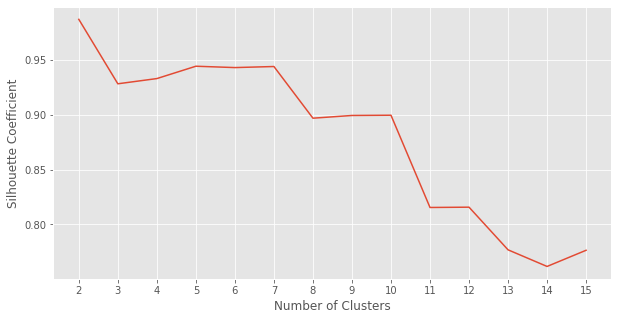

In [326]:
plt.figure(figsize=(10, 5)) 
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

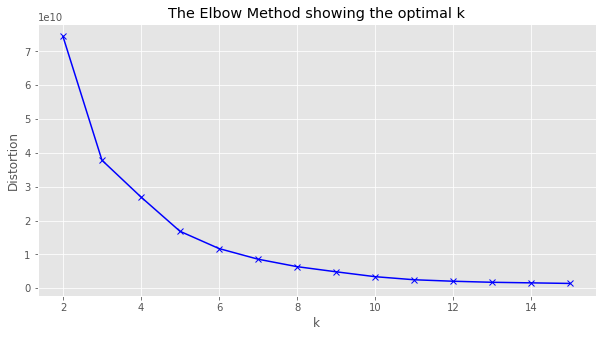

In [327]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [328]:
kl = KneeLocator(range(2, 16), distortions, curve="convex", direction="decreasing")
kl.elbow

5

In [329]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df25)
kmeanModel.inertia_

16812425767.188448

In [330]:
labels25=kmeanModel.labels_
labels25=pd.DataFrame(labels25)

In [331]:
labels25= labels25.rename(columns={0:'cluster'})

In [332]:
labels25.value_counts()

cluster
0          11362
3            202
2            167
4            120
1            100
dtype: int64

**PCA**

In [333]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df25)

In [334]:
type(principalComponents)
principalComponents.shape

(11951, 2)

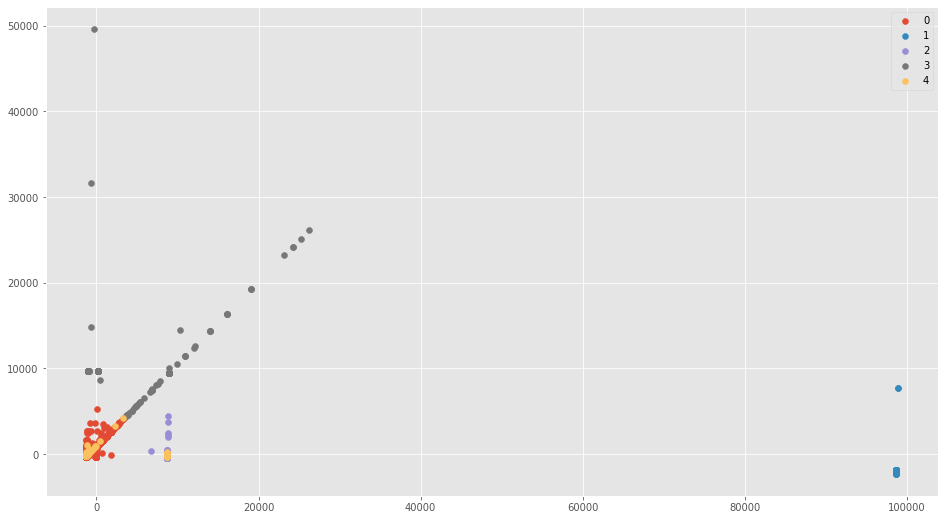

In [335]:
for i in range(5):
  plt.scatter(principalComponents[kmeanModel.labels_==i,0],principalComponents[kmeanModel.labels_==i,1],label=i)
plt.legend()
plt.show()

In [336]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [337]:
final_df = pd.concat([principalDf, labels25[['cluster']]], axis = 1)
final_df.head()

pc1         pc2  cluster
0 -1270.157410 -329.333485        0
1  8723.021743 -519.074452        2
2 -1258.956432 -318.550089        0
3 -1222.251366 -283.217244        0
4 -1191.653297 -253.200872        0

In [339]:
X = np.array(final_df[['pc1','pc2']])
y = np.array(final_df['cluster'])
X.shape

(11951, 2)

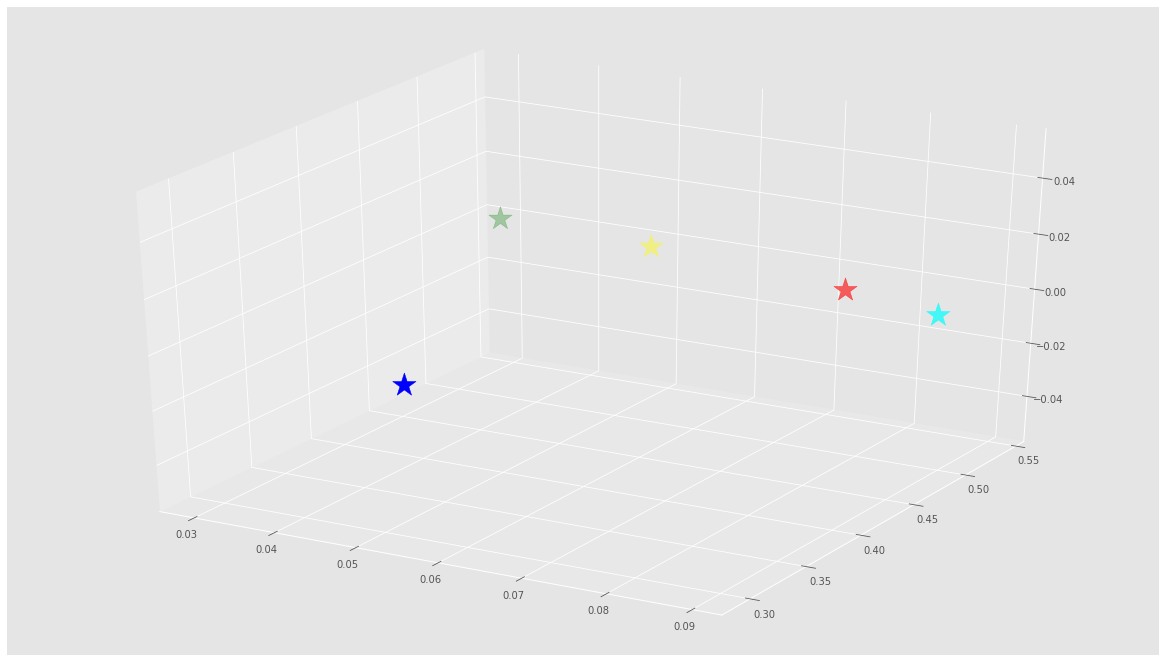

In [343]:
labels = y
# Getting the cluster centers
C = kmeanModel.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=600)

**TSNE**

In [344]:
X25_embedded = TSNE(n_components=2).fit_transform(df25)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


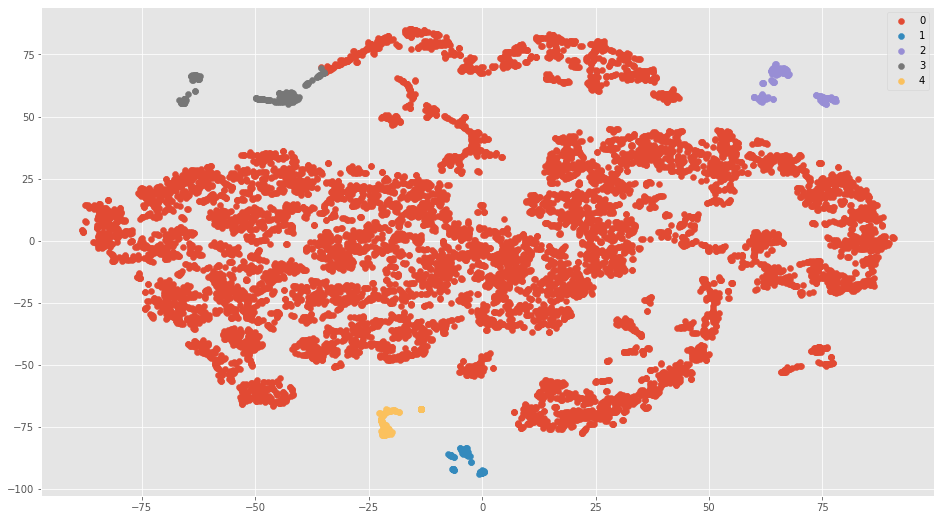

In [370]:
for i in range(5):
    plt.scatter(X25_embedded[kmeanModel.labels_==i,0],X25_embedded[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()

### **20% de los datos**:

In [350]:
distortions = []
silhouette_coefficients= []
K = range(2,16,1)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df20)
    distortions.append(kmeanModel.inertia_)
    score = silhouette_score(df20, kmeanModel.labels_)
    silhouette_coefficients.append(score)

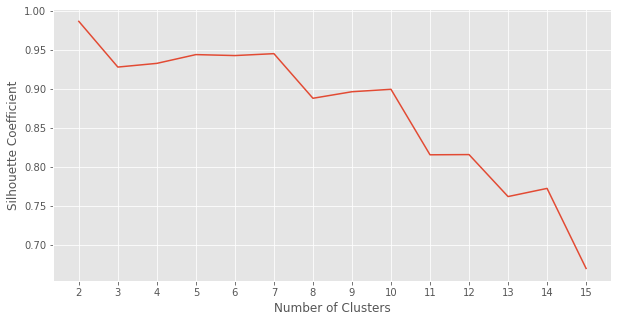

In [353]:
plt.figure(figsize=(10, 5)) 
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

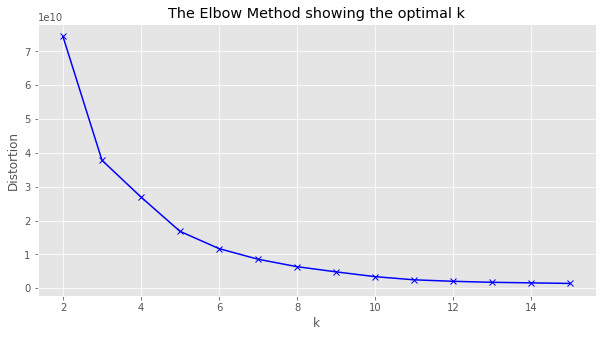

In [354]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [355]:
kl = KneeLocator(range(2, 16), distortions, curve="convex", direction="decreasing")
kl.elbow

5

In [356]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df20)
kmeanModel.inertia_

16812398096.704414

In [357]:
labels20=kmeanModel.labels_
labels20=pd.DataFrame(labels20)

In [358]:
labels20= labels20.rename(columns={0:'cluster'})

In [359]:
labels20.value_counts()

cluster
0          11362
3            202
2            167
4            120
1            100
dtype: int64

**PCA**

In [360]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df20)

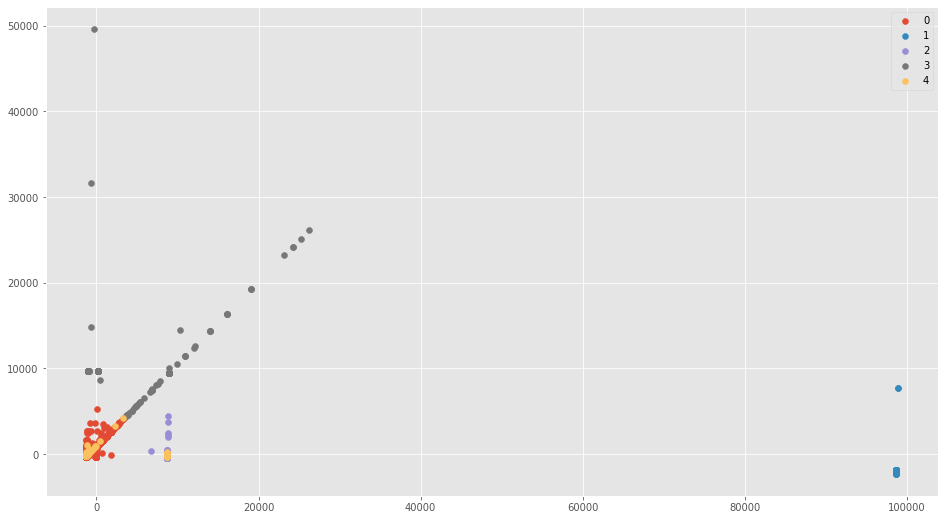

In [361]:
for i in range(5):
  plt.scatter(principalComponents[kmeanModel.labels_==i,0],principalComponents[kmeanModel.labels_==i,1],label=i)
plt.legend()
plt.show()

In [362]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [363]:
final_df = pd.concat([principalDf, labels20[['cluster']]], axis = 1)
final_df.head()

pc1         pc2  cluster
0 -1270.157413 -329.333466        0
1  8723.021742 -519.074453        2
2 -1258.956431 -318.550076        0
3 -1222.251366 -283.217233        0
4 -1191.653298 -253.200855        0

In [364]:
X = np.array(final_df[['pc1','pc2']])
y = np.array(final_df['cluster'])
X.shape

(11951, 2)

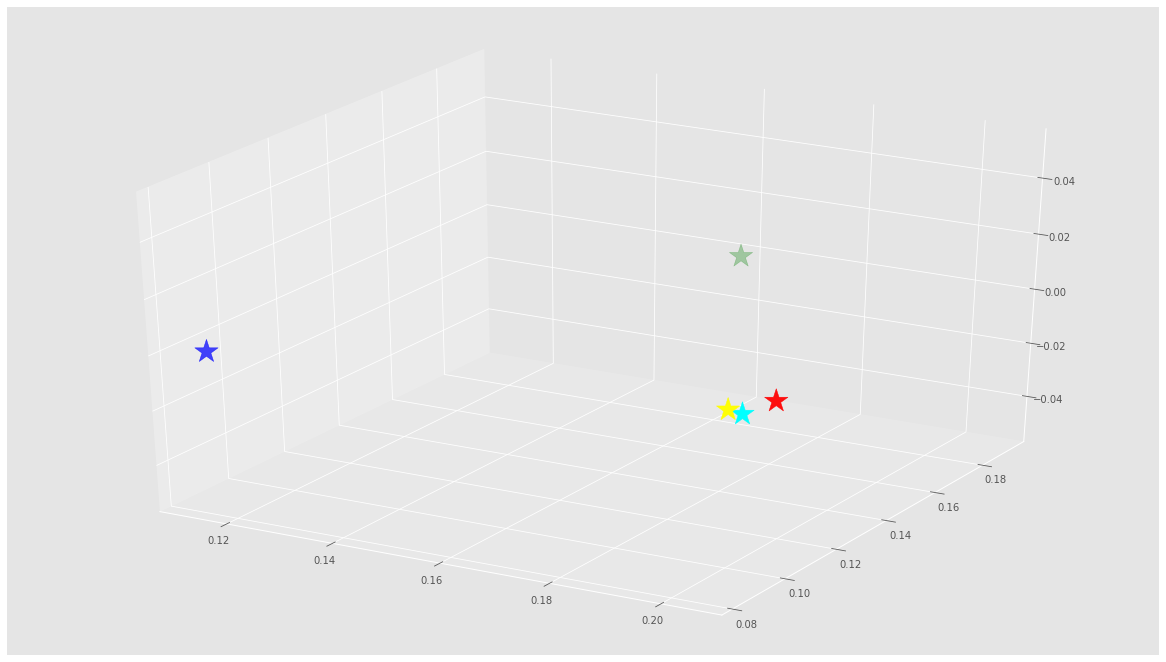

In [367]:
labels = y
# Getting the cluster centers
C = kmeanModel.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=600)

**TSNE**

In [368]:
X20_embedded = TSNE(n_components=2).fit_transform(df20)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


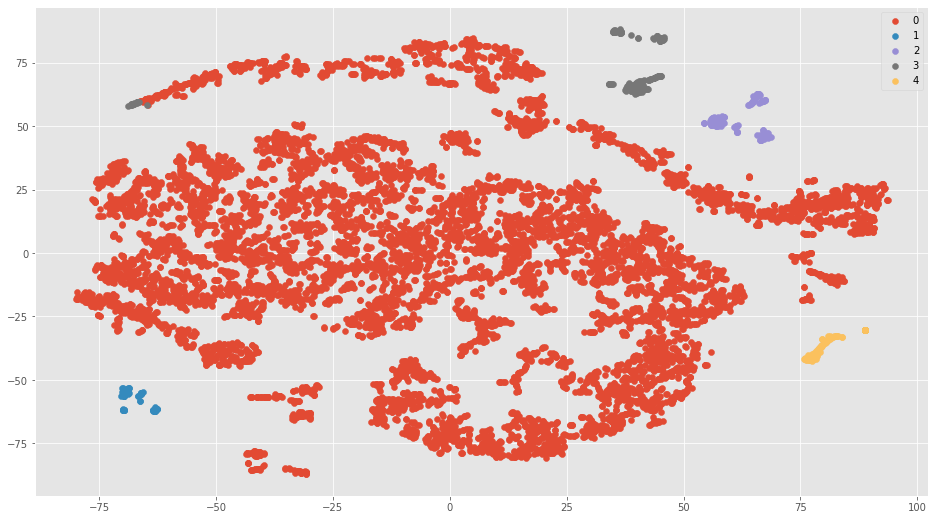

In [369]:
for i in range(5):
    plt.scatter(X20_embedded[kmeanModel.labels_==i,0],X20_embedded[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()

### **15% de los datos**:

In [371]:
distortions= []
silhouette_coefficients= []
K= range(2,16,1)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df15)
    distortions.append(kmeanModel.inertia_)
    score = silhouette_score(df15, kmeanModel.labels_)
    silhouette_coefficients.append(score)

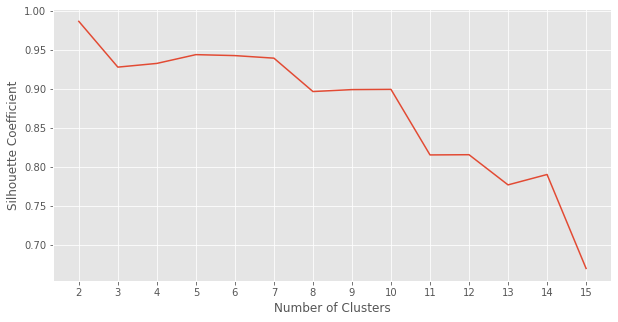

In [374]:
plt.figure(figsize=(10, 5)) 
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

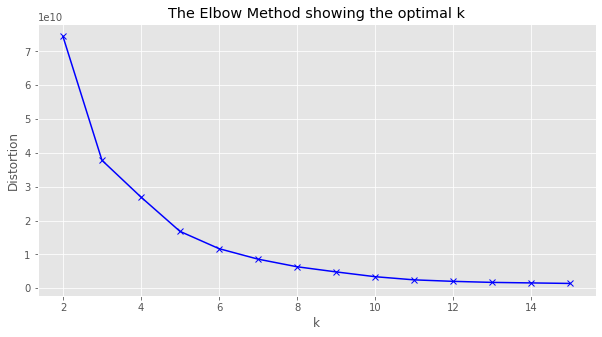

In [375]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [376]:
kl = KneeLocator(range(2, 16), distortions, curve="convex", direction="decreasing")
kl.elbow

5

In [377]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df15)
kmeanModel.inertia_

16812325629.510626

In [378]:
labels15=kmeanModel.labels_
labels15=pd.DataFrame(labels15)

In [379]:
labels15= labels15.rename(columns={0:'cluster'})

In [380]:
labels15.value_counts()

cluster
0          11362
4            202
2            167
3            120
1            100
dtype: int64

**PCA**

In [381]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df15)

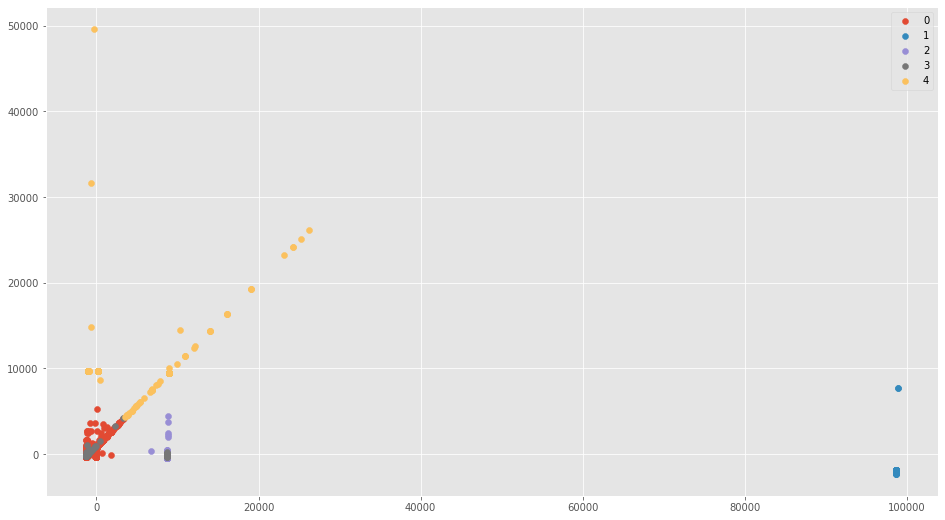

In [382]:
for i in range(5):
  plt.scatter(principalComponents[kmeanModel.labels_==i,0],principalComponents[kmeanModel.labels_==i,1],label=i)
plt.legend()
plt.show()

In [383]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [384]:
final_df = pd.concat([principalDf, labels15[['cluster']]], axis = 1)
final_df.head()

pc1         pc2  cluster
0 -1270.157414 -329.333462        0
1  8723.021745 -519.074475        2
2 -1258.956428 -318.550053        0
3 -1222.251363 -283.217245        0
4 -1191.653293 -253.200806        0

In [385]:
X = np.array(final_df[['pc1','pc2']])
y = np.array(final_df['cluster'])
X.shape

(11951, 2)

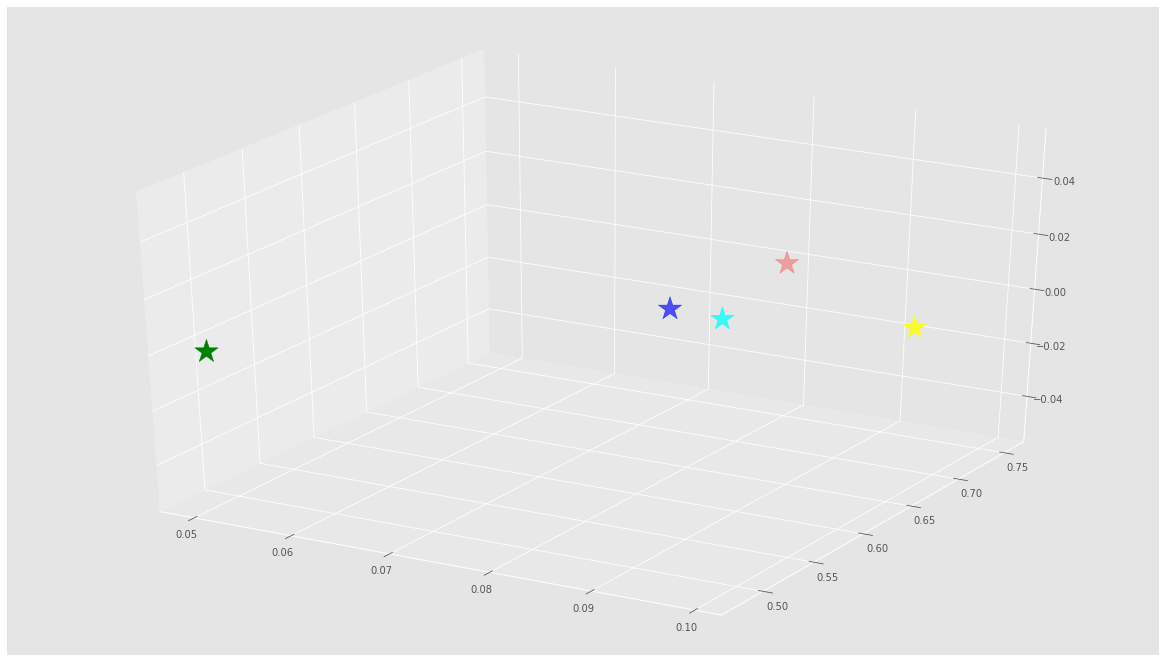

In [386]:
labels = y
# Getting the cluster centers
C = kmeanModel.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=600)

**TSNE**

In [387]:
X15_embedded = TSNE(n_components=2).fit_transform(df15)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


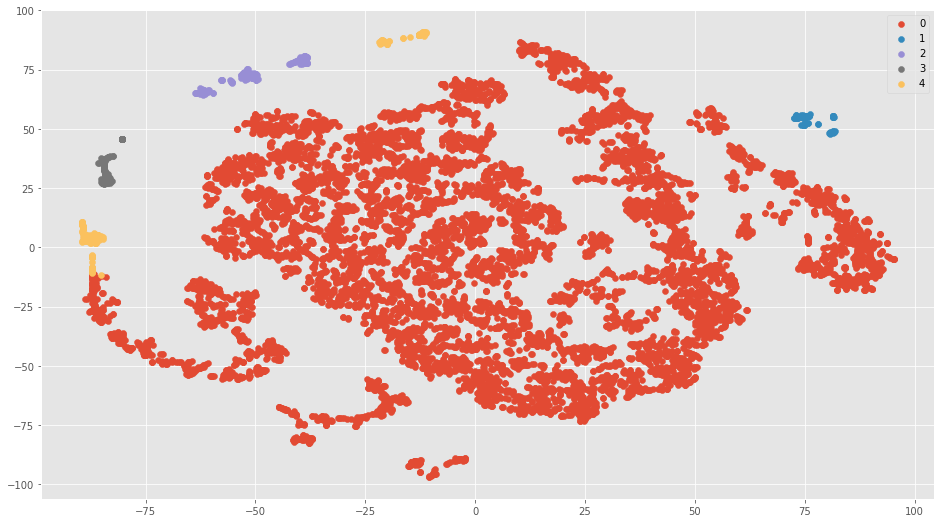

In [388]:
for i in range(5):
    plt.scatter(X15_embedded[kmeanModel.labels_==i,0],X15_embedded[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()

### **10% de los datos**:

In [389]:
distortions = []
silhouette_coefficients= []
K= range(2,16,1)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df10)
    distortions.append(kmeanModel.inertia_)
    score = silhouette_score(df10, kmeanModel.labels_)
    silhouette_coefficients.append(score)

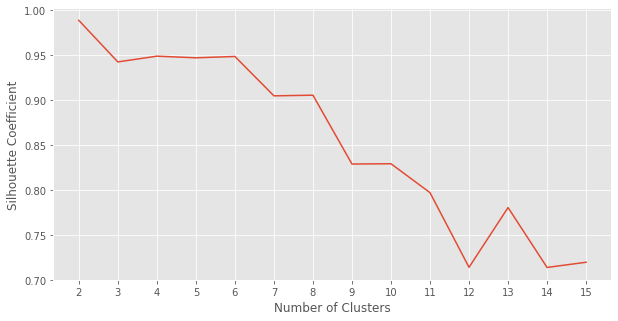

In [391]:
plt.figure(figsize=(10, 5)) 
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

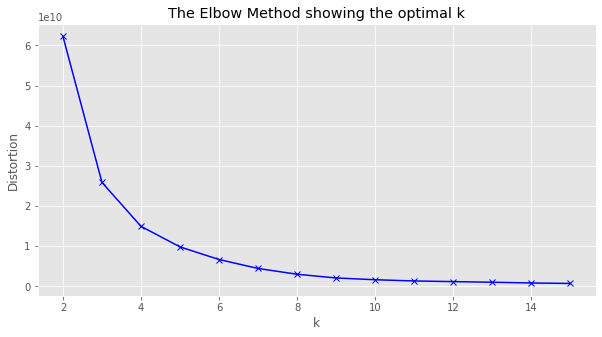

In [392]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [394]:
kl = KneeLocator(range(2, 16), distortions, curve="convex", direction="decreasing")
kl.elbow

5

In [395]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df10)
kmeanModel.inertia_

9839282945.665558

In [396]:
labels10=kmeanModel.labels_
labels10=pd.DataFrame(labels10)

In [397]:
labels10= labels10.rename(columns={0:'cluster'})

In [398]:
labels10.value_counts()

cluster
0          11429
3            186
4            131
2            105
1            100
dtype: int64

**PCA**

In [401]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df10)

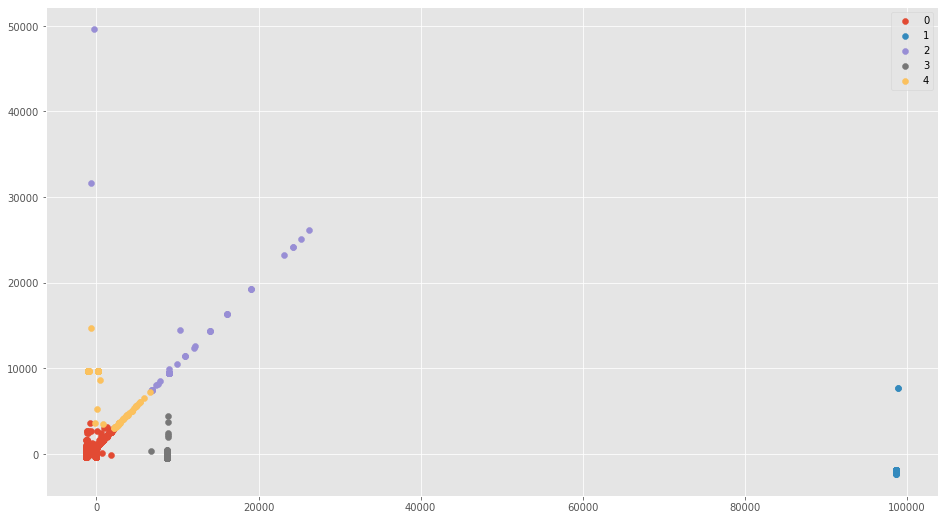

In [402]:
for i in range(5):
  plt.scatter(principalComponents[kmeanModel.labels_==i,0],principalComponents[kmeanModel.labels_==i,1],label=i)
plt.legend()
plt.show()

In [403]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [404]:
final_df = pd.concat([principalDf, labels10[['cluster']]], axis = 1)
final_df.head()

pc1         pc2  cluster
0 -1269.981731 -327.658147        0
1  8723.205711 -517.298215        3
2 -1258.780950 -316.877892        0
3 -1222.081502 -281.589571        0
4 -1191.495058 -252.186605        0

In [405]:
X = np.array(final_df[['pc1','pc2']])
y = np.array(final_df['cluster'])
X.shape

(11951, 2)

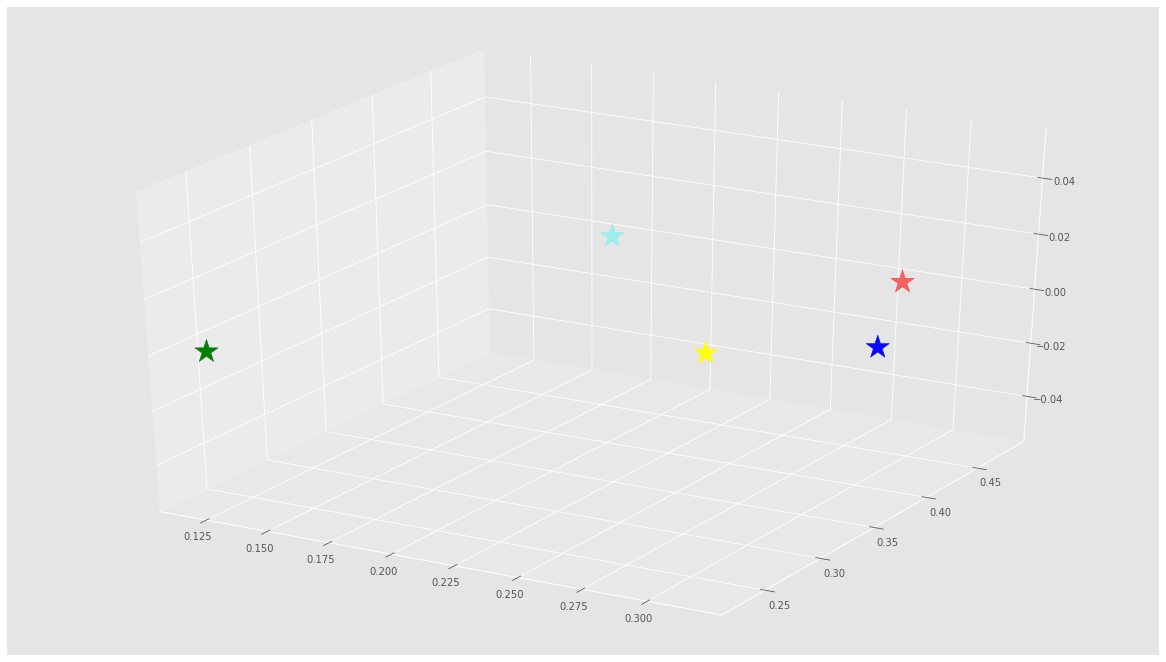

In [406]:
labels = y
# Getting the cluster centers
C = kmeanModel.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=600)

**TSNE**

In [407]:
X10_embedded = TSNE(n_components=2).fit_transform(df10)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


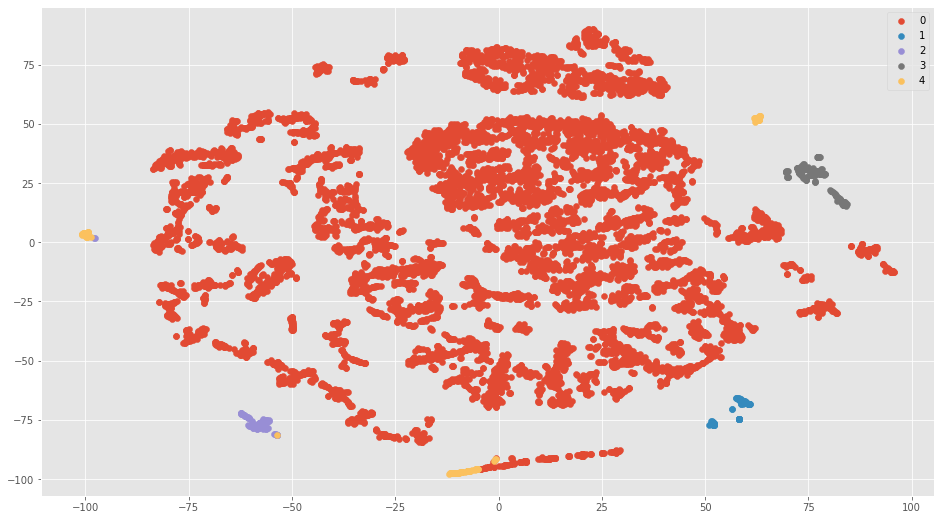

In [408]:
for i in range(5):
    plt.scatter(X10_embedded[kmeanModel.labels_==i,0],X10_embedded[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()

### **5% de los datos**:

In [409]:
distortions = []
silhouette_coefficients= []
K= range(2,16,1)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df5)
    distortions.append(kmeanModel.inertia_)
    score = silhouette_score(df5, kmeanModel.labels_)
    silhouette_coefficients.append(score)

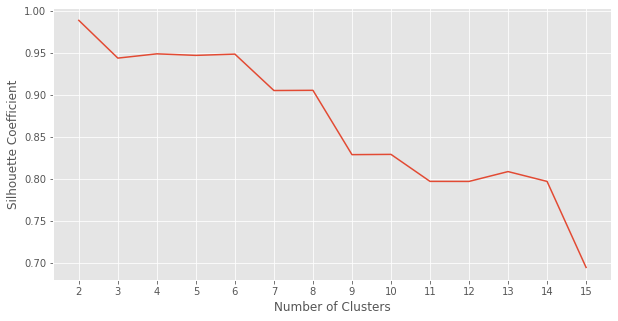

In [411]:
plt.figure(figsize=(10, 5)) 
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

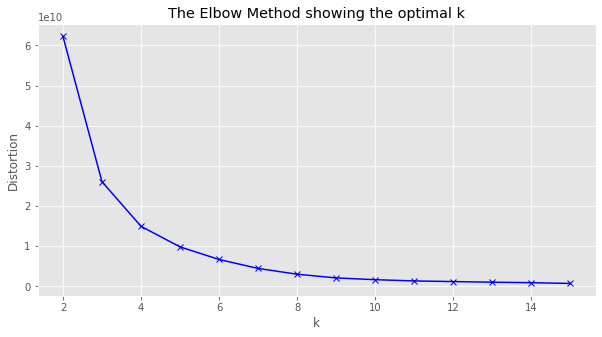

In [412]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [413]:
kl = KneeLocator(range(2, 16), distortions, curve="convex", direction="decreasing")
kl.elbow

5

In [414]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df5)
kmeanModel.inertia_

9839185949.807364

In [415]:
labels5=kmeanModel.labels_
labels5=pd.DataFrame(labels5)

In [416]:
labels5= labels5.rename(columns={0:'cluster'})

In [417]:
labels5.value_counts()

cluster
0          11429
3            186
2            131
4            105
1            100
dtype: int64

**PCA**

In [418]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df5)

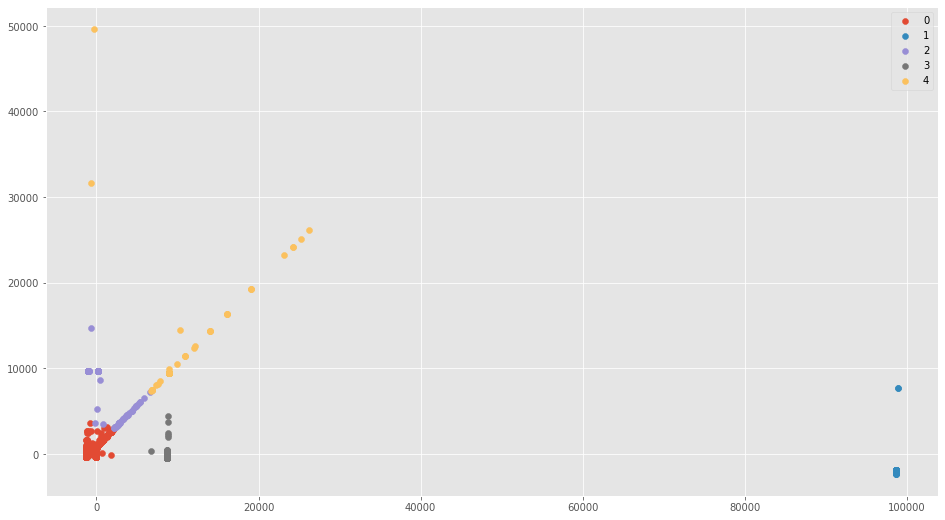

In [419]:
for i in range(5):
  plt.scatter(principalComponents[kmeanModel.labels_==i,0],principalComponents[kmeanModel.labels_==i,1],label=i)
plt.legend()
plt.show()

In [420]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [421]:
final_df = pd.concat([principalDf, labels5[['cluster']]], axis = 1)
final_df.head()

pc1         pc2  cluster
0 -1269.981729 -327.658113        0
1  8723.205717 -517.298215        3
2 -1258.780949 -316.877897        0
3 -1222.081496 -281.589568        0
4 -1191.495050 -252.186567        0

In [422]:
X = np.array(final_df[['pc1','pc2']])
y = np.array(final_df['cluster'])
X.shape

(11951, 2)

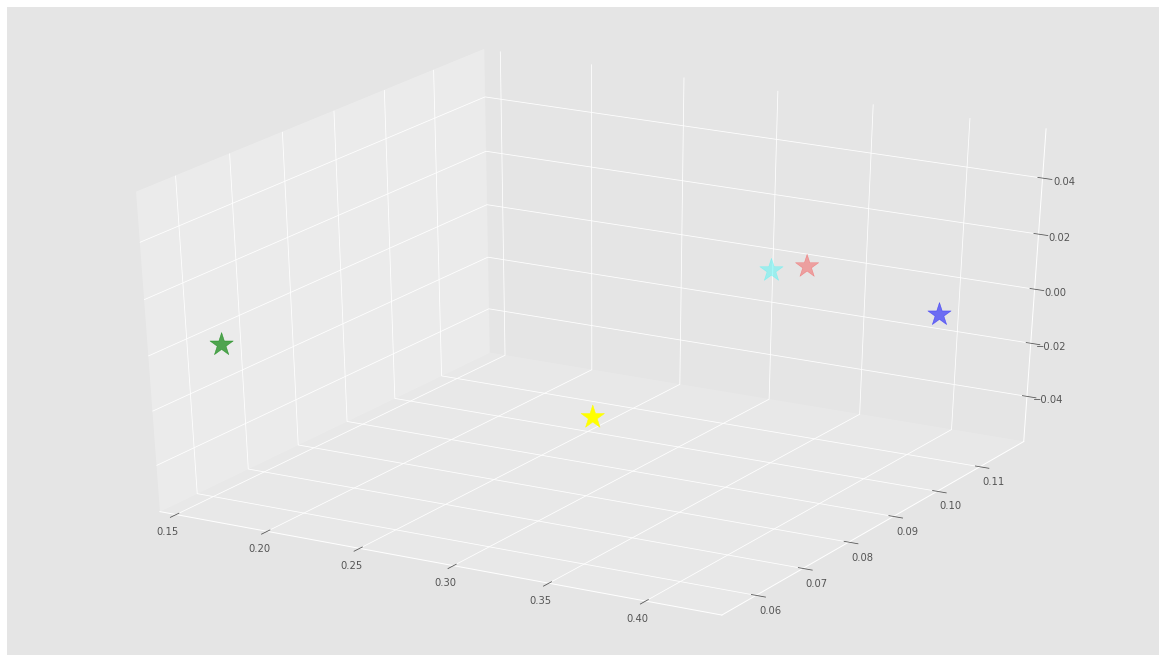

In [423]:
labels = y
# Getting the cluster centers
C = kmeanModel.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=600)

**TSNE**

In [424]:
X5_embedded = TSNE(n_components=2).fit_transform(df5)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


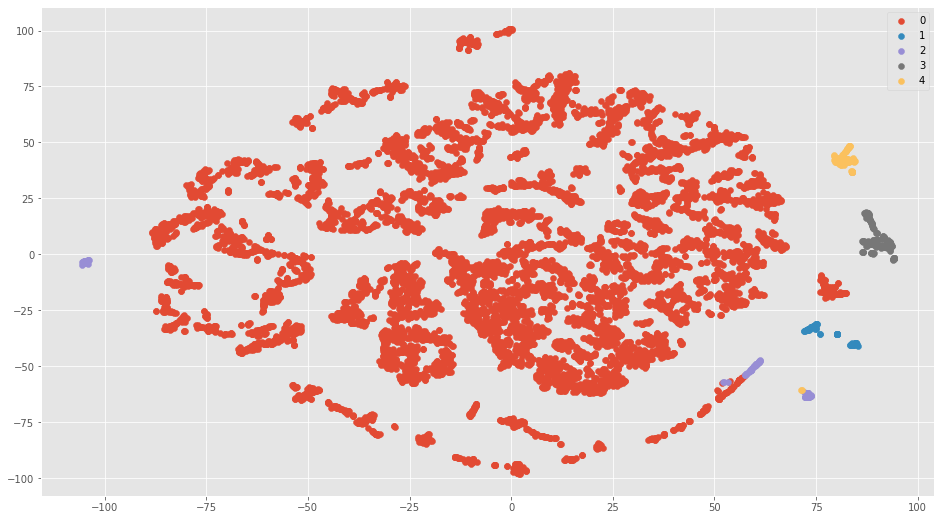

In [425]:
for i in range(5):
    plt.scatter(X5_embedded[kmeanModel.labels_==i,0],X5_embedded[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()

# 2. Datos Escalados

### **25% de los datos:**

In [426]:
scaler = StandardScaler()
scaler.fit(df25)
df25=scaler.transform(df25)

In [427]:
df25.shape

(11951, 252)

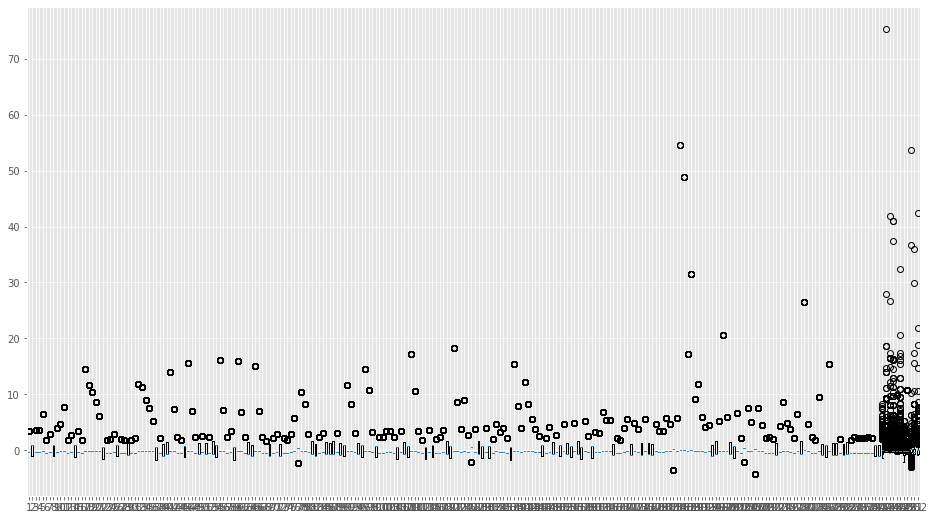

In [428]:
plt.boxplot(df25)
plt.show()

In [429]:
distortions = []
silhouette_coefficients= []
K= np.arange(2,16,1)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df25)
    distortions.append(kmeanModel.inertia_)
    score = silhouette_score(df25, kmeanModel.labels_)
    silhouette_coefficients.append(score)

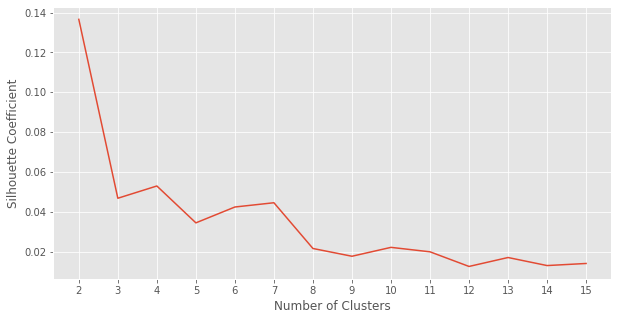

In [431]:
plt.figure(figsize=(10, 5)) 
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

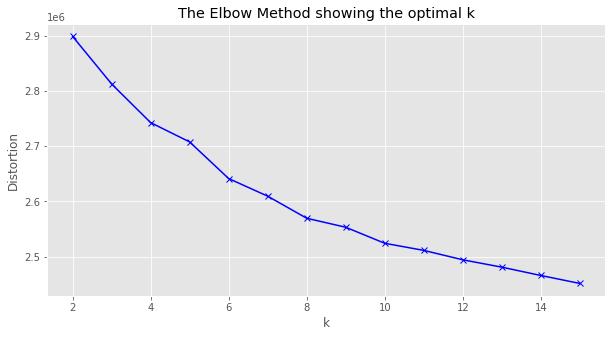

In [432]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [433]:
kl = KneeLocator(range(2, 16), distortions, curve="convex", direction="decreasing")
kl.elbow

8

De acuerdo con los resultados anteriores corremos el modelo con 6 clusters. 

In [435]:
kmeanModel = KMeans(n_clusters=8)
kmeanModel.fit(df25)
kmeanModel.inertia_

2569477.4895437015

In [436]:
labels25_e=kmeanModel.labels_
labels25_e=pd.DataFrame(labels25_e)

In [437]:
labels25_e = labels25_e.rename(columns={0:'cluster'})

In [438]:
labels25_e.value_counts()

cluster
5          3204
2          2535
1          2304
7          1850
0          1090
3           702
4           222
6            44
dtype: int64

**PCA**

In [439]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df25)

In [440]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

Unimos los clusters con los dos componentes:

In [441]:
final_df = pd.concat([principalDf, labels25_e[['cluster']]], axis = 1)
final_df.head()

principal component 1  principal component 2  cluster
0               2.127218               6.535460        1
1              -2.049464              -0.093812        5
2              -2.265402              -0.543557        2
3              -2.657512              -2.373649        2
4              -0.820385               5.678619        1

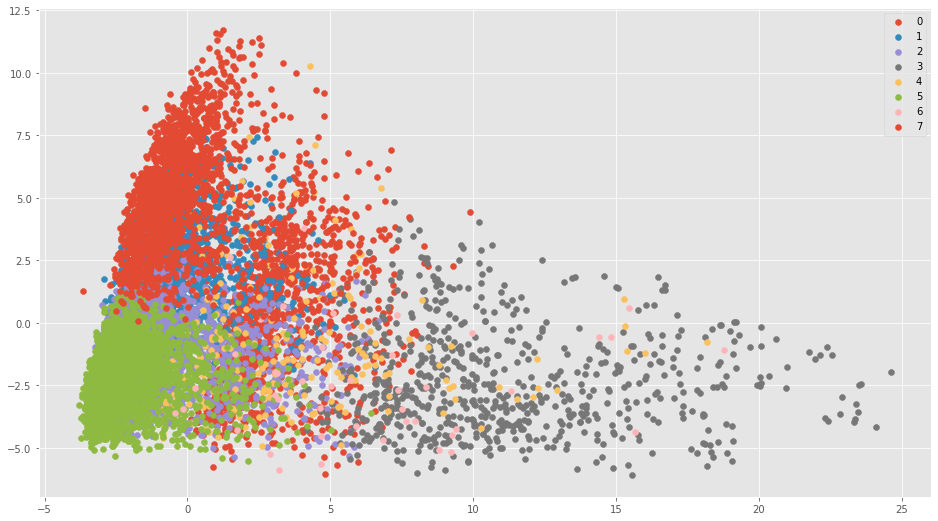

In [442]:
for i in range(8):
    plt.scatter(principalComponents[kmeanModel.labels_==i,0],principalComponents[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()

In [443]:
X = np.array(final_df[['principal component 1','principal component 2']])
y = np.array(final_df['cluster'])
X.shape

(11951, 2)

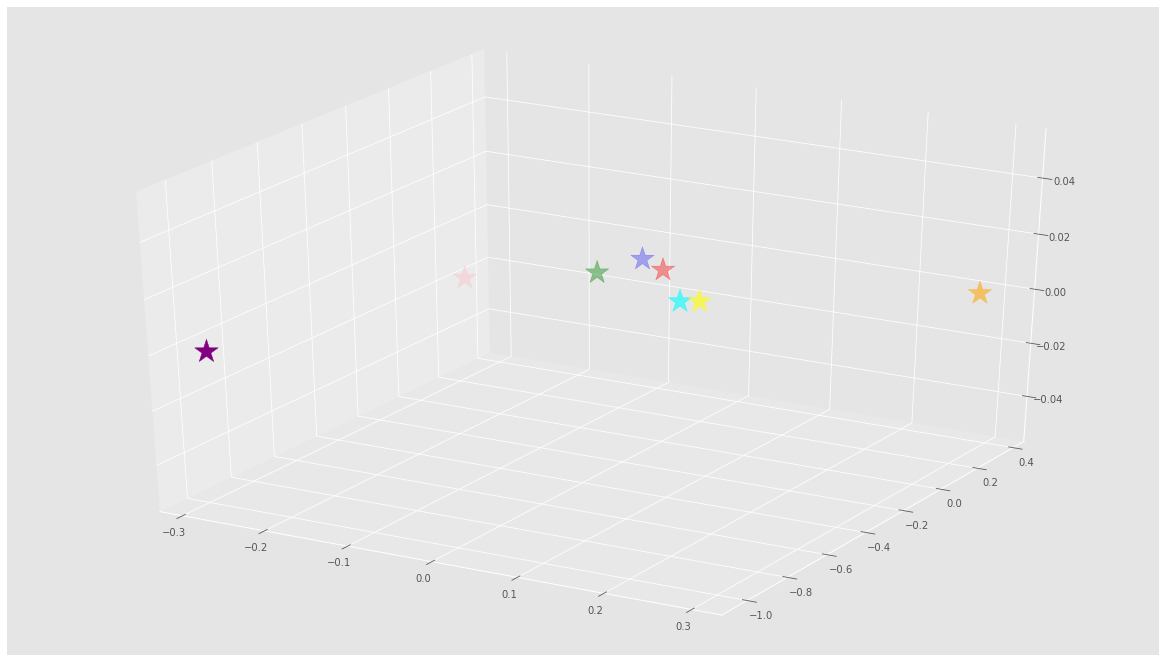

In [444]:
labels = y
# Getting the cluster centers
C = kmeanModel.cluster_centers_
colores=['red','green','blue','cyan','yellow', 'orange', 'pink','purple']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=600)

**TSNE**

In [445]:
X25e_embedded = TSNE(n_components=2).fit_transform(df25)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


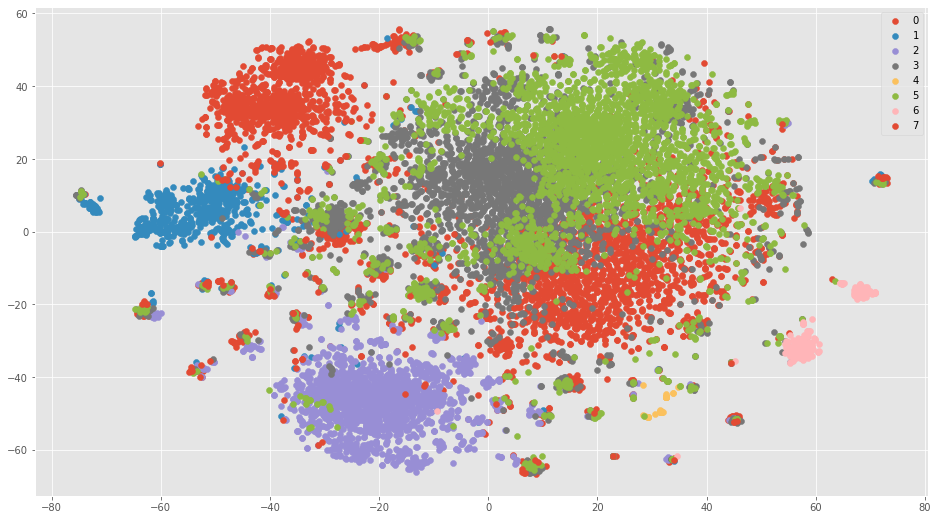

In [467]:
for i in range(8):
    plt.scatter(X25e_embedded[kmeanModel.labels_==i,0],X25e_embedded[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()

In [ ]:
final_df.to_csv('/home/mariana/Documents/TESIS_MS/DeepLearning_Patrones_Infonavit/data/dfPCA.csv')  

### **20% de los datos:**

In [447]:
scaler = StandardScaler()
scaler.fit(df20)
df20=scaler.transform(df20)

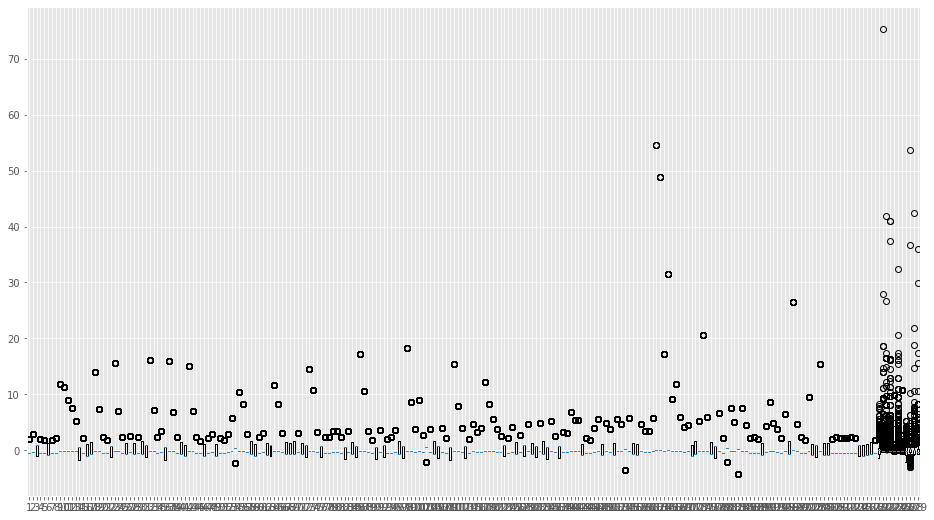

In [448]:
plt.boxplot(df20)
plt.show()

In [449]:
distortions = []
silhouette_coefficients= []
K= np.arange(2,16,1)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df20)
    distortions.append(kmeanModel.inertia_)
    score = silhouette_score(df20, kmeanModel.labels_)
    silhouette_coefficients.append(score)

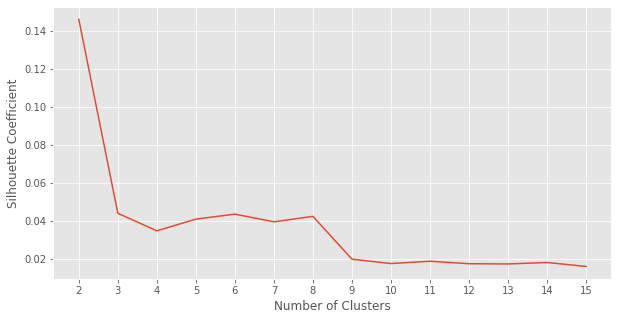

In [451]:
plt.figure(figsize=(10, 5)) 
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

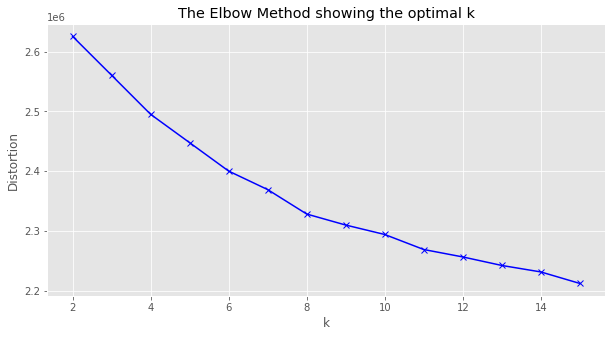

In [452]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [453]:
kl = KneeLocator(range(2, 16), distortions, curve="convex", direction="decreasing")
kl.elbow

8

De acuerdo con los resultados anteriores corremos el modelo con 8 clusters. 

In [454]:
kmeanModel = KMeans(n_clusters=8)
kmeanModel.fit(df20)
kmeanModel.inertia_

2330048.971004278

In [455]:
labels20_e=kmeanModel.labels_
labels20_e=pd.DataFrame(labels20_e)

In [456]:
labels20_e = labels20_e.rename(columns={0:'cluster'})

In [457]:
labels20_e.value_counts()

cluster
5          3110
3          2593
0          2363
2          1786
7          1118
1           710
6           223
4            48
dtype: int64

**PCA**

In [458]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df20)

In [459]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [460]:
final_df = pd.concat([principalDf, labels20_e[['cluster']]], axis = 1)
final_df.head()

principal component 1  principal component 2  cluster
0               1.284671               8.716661        0
1              -2.106855              -0.337805        5
2              -2.143464              -0.731338        3
3              -2.266302              -2.618970        3
4              -1.312254               7.209431        0

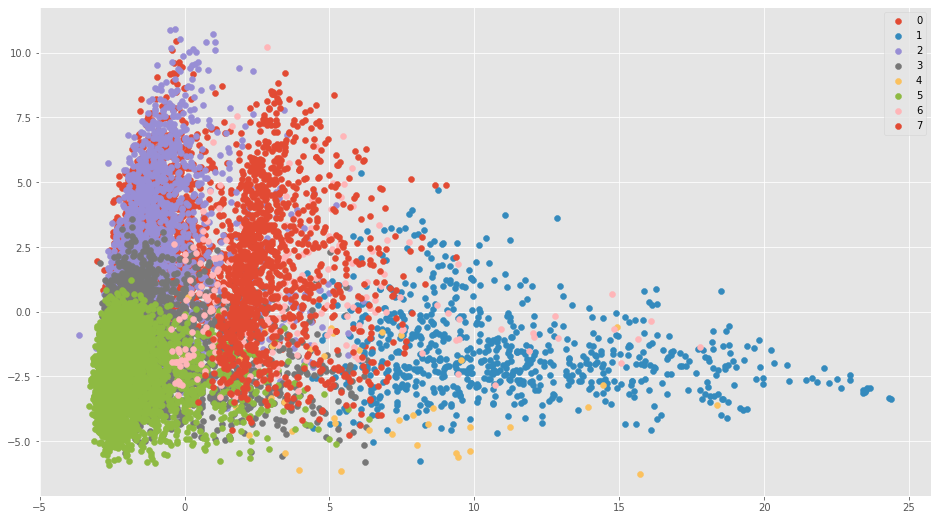

In [461]:
for i in range(8):
    plt.scatter(principalComponents[kmeanModel.labels_==i,0],principalComponents[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()

In [462]:
X = np.array(final_df[['principal component 1','principal component 2']])
y = np.array(final_df['cluster'])
X.shape

(11951, 2)

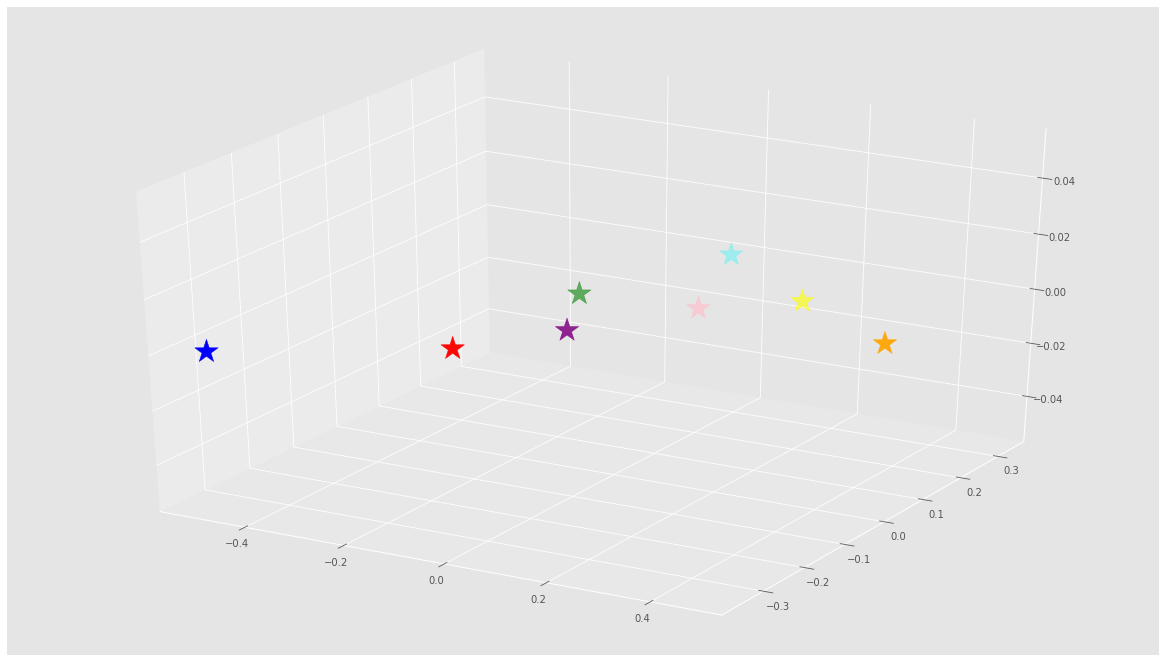

In [463]:
labels = y
# Getting the cluster centers
C = kmeanModel.cluster_centers_
colores=['red','green','blue','cyan','yellow', 'orange', 'pink', 'purple']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=600)

**TSNE**

In [465]:
X20e_embedded = TSNE(n_components=2).fit_transform(df20)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


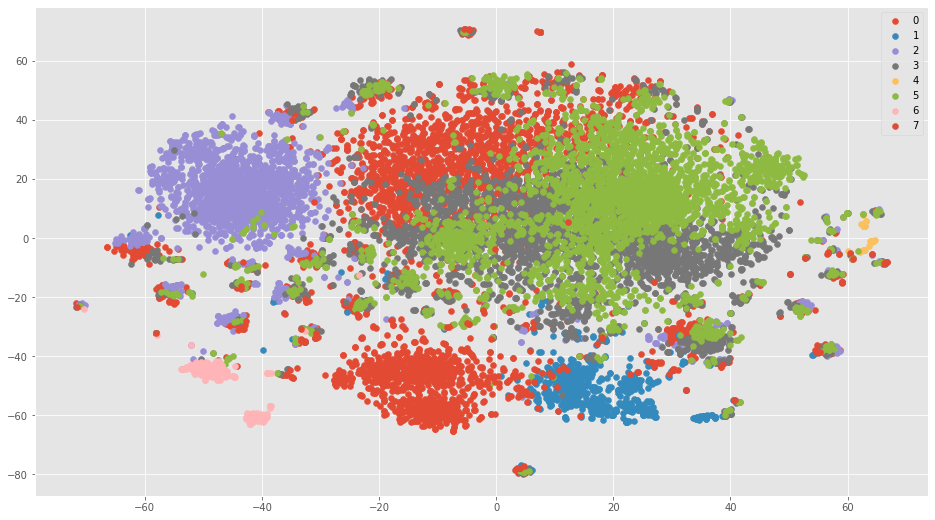

In [466]:
for i in range(8):
    plt.scatter(X20e_embedded[kmeanModel.labels_==i,0],X20e_embedded[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()

### **15% de los datos:**

In [468]:
scaler = StandardScaler()
scaler.fit(df15)
df15=scaler.transform(df15)

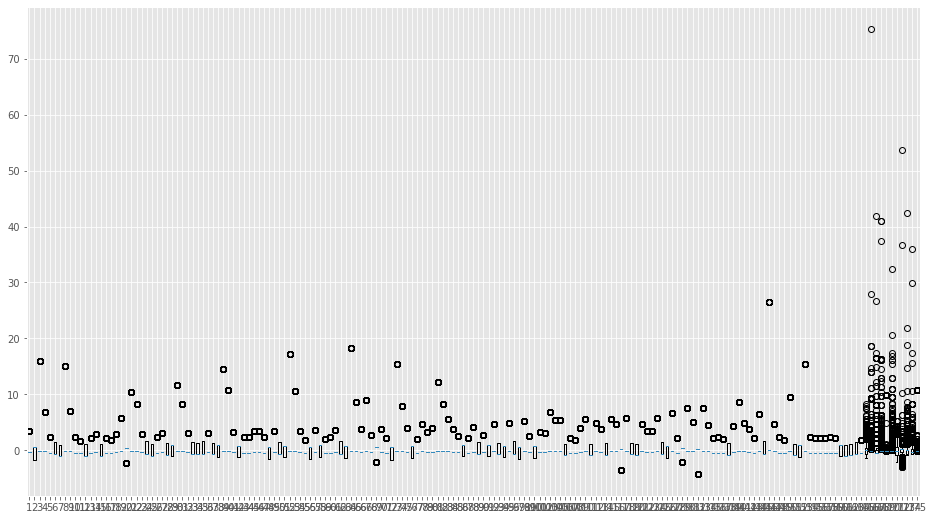

In [469]:
plt.boxplot(df15)
plt.show()

In [470]:
distortions = []
silhouette_coefficients = []
K= np.arange(2,16,1)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df15)
    distortions.append(kmeanModel.inertia_)
    score = silhouette_score(df15, kmeanModel.labels_)
    silhouette_coefficients.append(score)

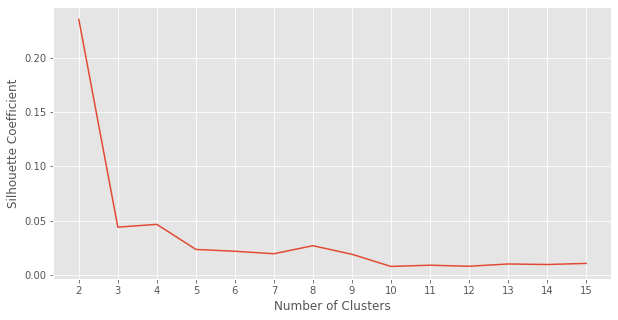

In [472]:
plt.figure(figsize=(10, 5)) 
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

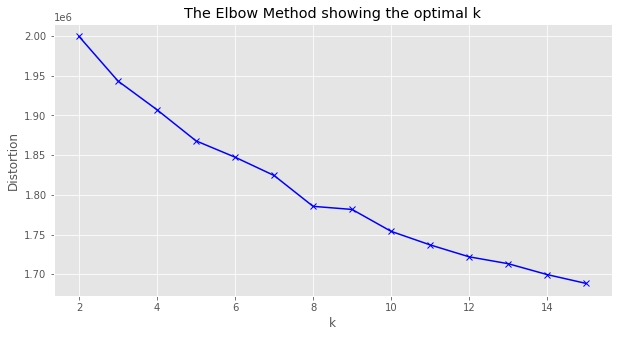

In [474]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [475]:
kl = KneeLocator(range(2, 16), distortions, curve="convex", direction="decreasing")
kl.elbow

10

De acuerdo con los resultados anteriores corremos el modelo con 10 clusters.

In [479]:
kmeanModel = KMeans(n_clusters=10)
kmeanModel.fit(df15)
kmeanModel.inertia_

1754007.7010363082

In [480]:
labels15_e=kmeanModel.labels_
labels15_e=pd.DataFrame(labels15_e)

In [481]:
labels15_e = labels15_e.rename(columns={0:'cluster'})

In [482]:
labels15_e.value_counts()

cluster
9          2638
4          2235
5          2044
6          1575
0          1507
1          1006
2           735
7           104
8            78
3            29
dtype: int64

**PCA**

In [483]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df15)

In [484]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [485]:
final_df = pd.concat([principalDf, labels15_e[['cluster']]], axis = 1)
final_df.head()

principal component 1  principal component 2  cluster
0               0.348893               7.247297        6
1              -1.967380              -1.112332        9
2              -1.615880               0.118185        5
3              -1.962863              -1.994521        5
4              -1.457361               6.360489        6

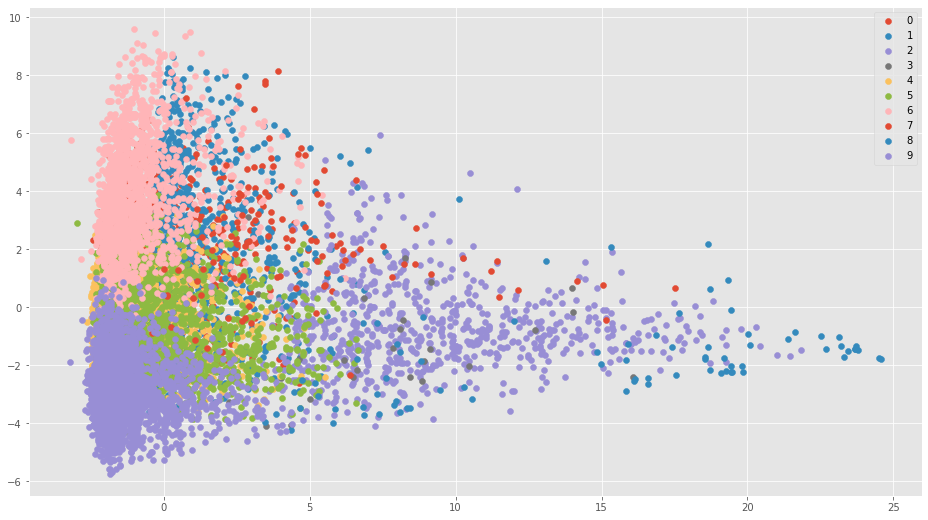

In [486]:
for i in range(10):
    plt.scatter(principalComponents[kmeanModel.labels_==i,0],principalComponents[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()

In [487]:
X = np.array(final_df[['principal component 1','principal component 2']])
y = np.array(final_df['cluster'])
X.shape

(11951, 2)

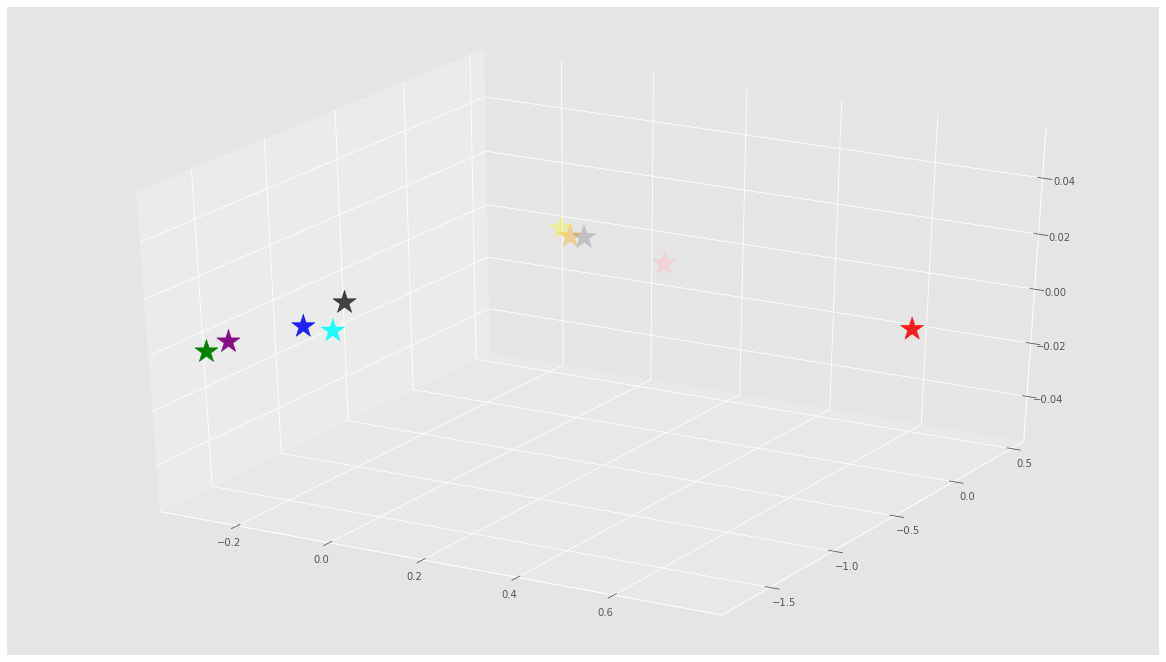

In [488]:
labels = y
# Getting the cluster centers
C = kmeanModel.cluster_centers_
colores=['red','green','blue','cyan','yellow', 'orange', 'pink', 'purple','black','grey']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=600)

**TSNE**

In [489]:
X15e_embedded = TSNE(n_components=2).fit_transform(df15)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


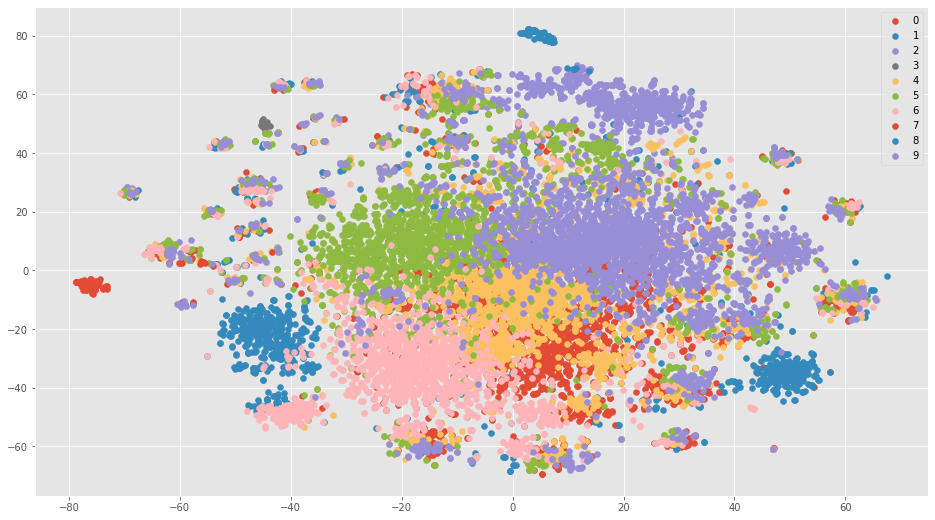

In [490]:
for i in range(10):
    plt.scatter(X15e_embedded[kmeanModel.labels_==i,0],X15e_embedded[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()

### **10% de los datos:**

In [491]:
scaler = StandardScaler()
scaler.fit(df10)
df10=scaler.transform(df10)

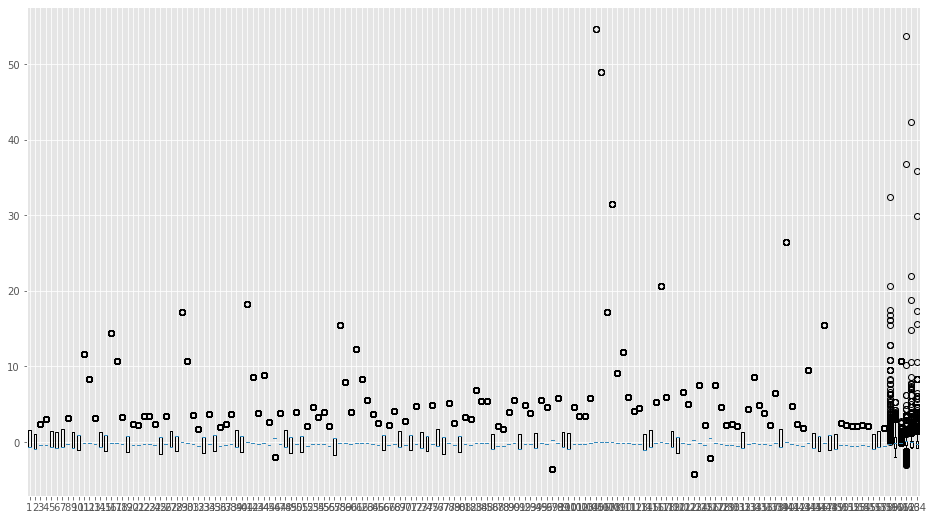

In [492]:
plt.boxplot(df10)
plt.show()

In [493]:
distortions = []
silhouette_coefficients= []
K= np.arange(2,16,1)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df10)
    distortions.append(kmeanModel.inertia_)
    score = silhouette_score(df10, kmeanModel.labels_)
    silhouette_coefficients.append(score)

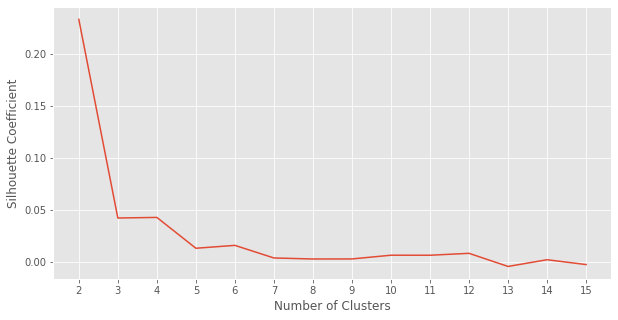

In [495]:
plt.figure(figsize=(10, 5)) 
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

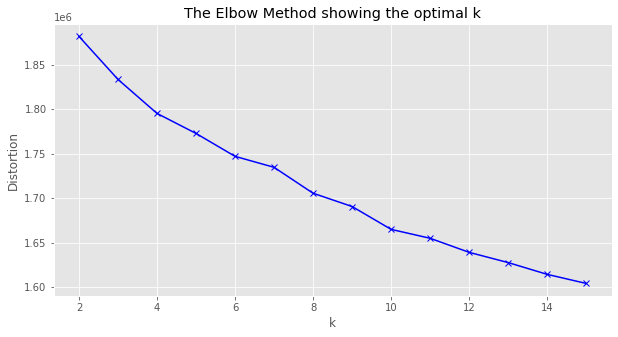

In [496]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [497]:
kl = KneeLocator(range(2, 16), distortions, curve="convex", direction="decreasing")
kl.elbow

10

De acuerdo con los resultados anteriores corremos el modelo con 10 clusters.

In [498]:
kmeanModel = KMeans(n_clusters=10)
kmeanModel.fit(df10)
kmeanModel.inertia_

1660736.9735565772

In [499]:
labels10_e=kmeanModel.labels_
labels10_e=pd.DataFrame(labels10_e)

In [500]:
labels10_e = labels10_e.rename(columns={0:'cluster'})

In [501]:
labels10_e.value_counts()

cluster
3          2746
2          2611
7          2121
8          1516
9          1407
0           670
1           652
5           117
4            78
6            33
dtype: int64

**PCA**

In [502]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df10)

In [503]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

Unimos los clusters con los dos componentes:

In [504]:
final_df = pd.concat([principalDf, labels10_e[['cluster']]], axis = 1)
final_df.head()

principal component 1  principal component 2  cluster
0              -0.626533               7.334103        8
1              -1.517868              -0.439087        7
2              -1.332675              -0.008330        3
3              -1.633356              -1.600641        3
4              -1.739265               6.104045        8

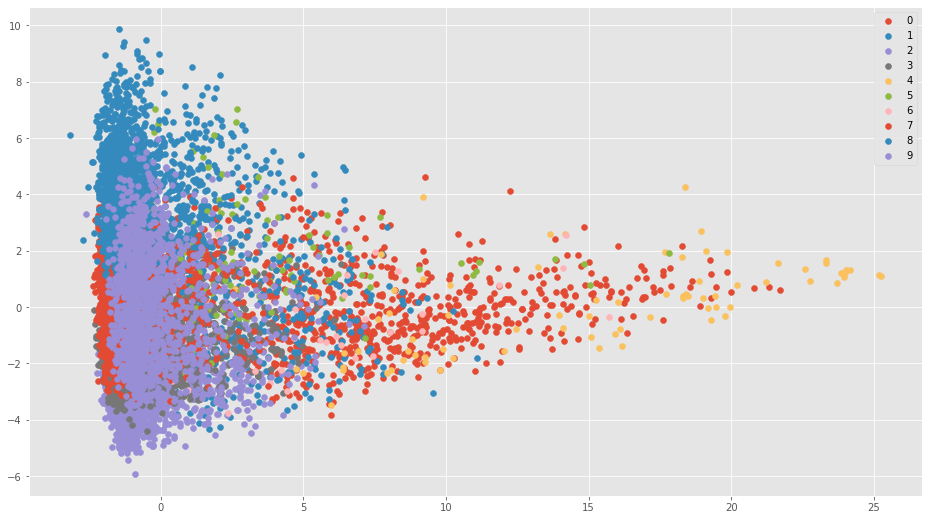

In [505]:
for i in range(10):
    plt.scatter(principalComponents[kmeanModel.labels_==i,0],principalComponents[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()

In [506]:
X = np.array(final_df[['principal component 1','principal component 2']])
y = np.array(final_df['cluster'])
X.shape

(11951, 2)

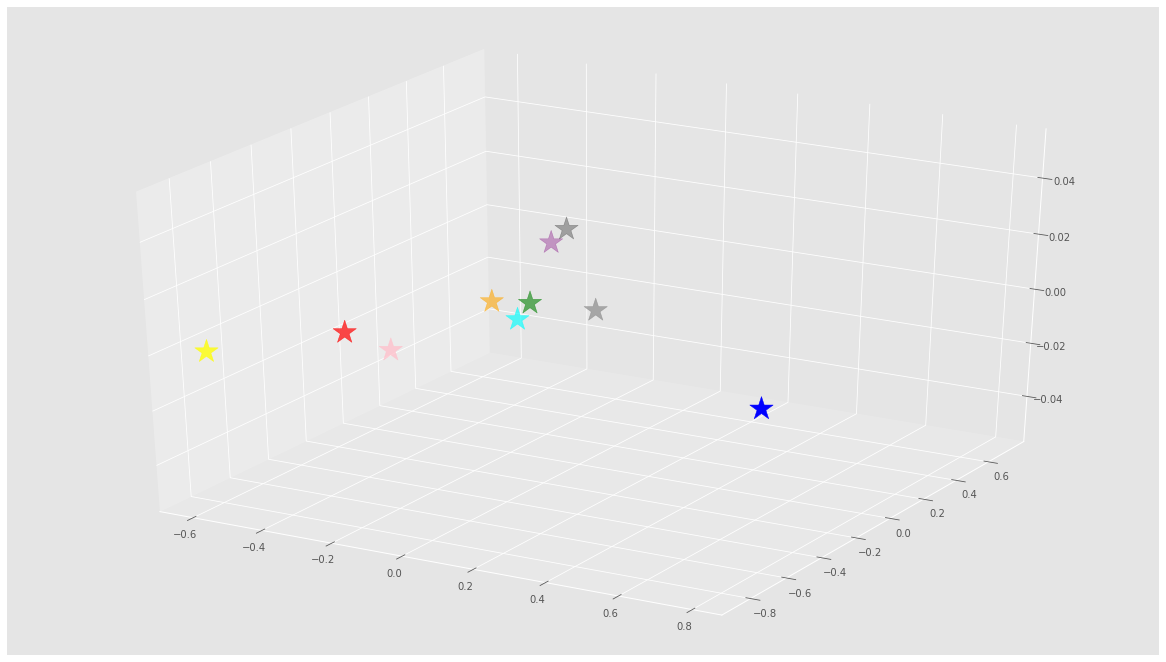

In [507]:
labels = y
# Getting the cluster centers
C = kmeanModel.cluster_centers_
colores=['red','green','blue','cyan','yellow', 'orange', 'pink', 'purple','black','grey']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=600)

**TSNE**

In [508]:
X10e_embedded = TSNE(n_components=2).fit_transform(df10)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


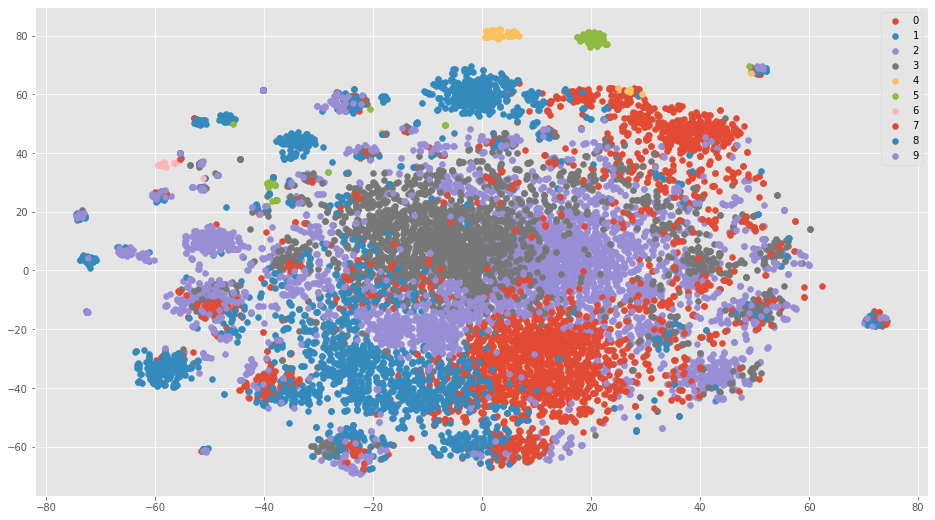

In [509]:
for i in range(10):
    plt.scatter(X10e_embedded[kmeanModel.labels_==i,0],X10e_embedded[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()

### **5% de los datos:**

In [510]:
scaler = StandardScaler()
scaler.fit(df5)
df5=scaler.transform(df5)

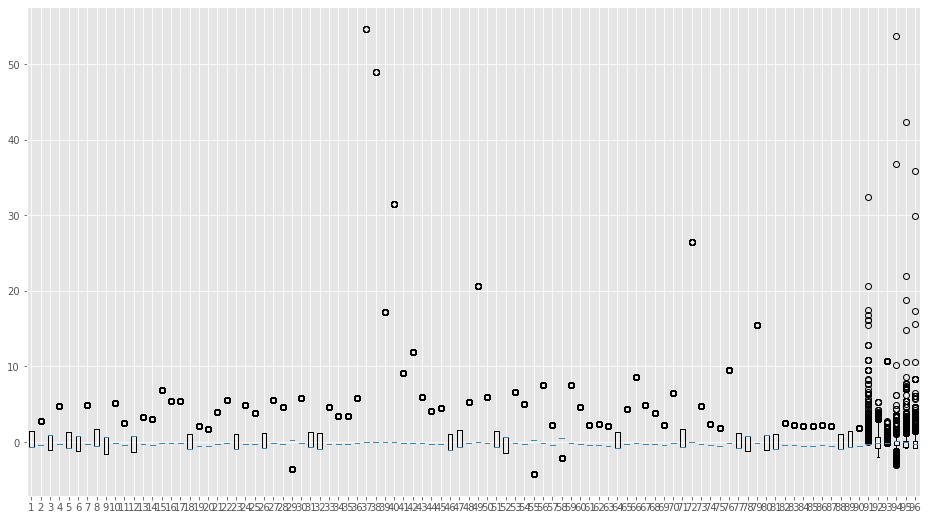

In [511]:
plt.boxplot(df5)
plt.show()

In [512]:
distortions = []
silhouette_coefficients= []
K= np.arange(2,16,1)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df5)
    distortions.append(kmeanModel.inertia_)
    score = silhouette_score(df5, kmeanModel.labels_)
    silhouette_coefficients.append(score)

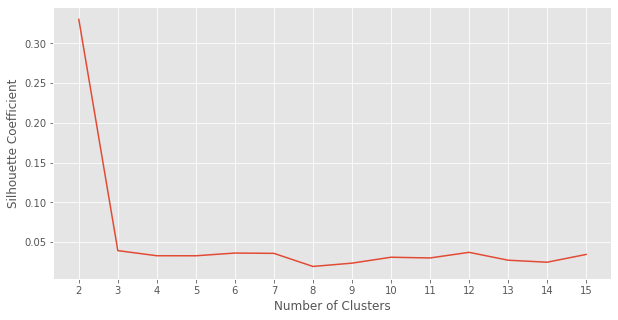

In [514]:
plt.figure(figsize=(10, 5)) 
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

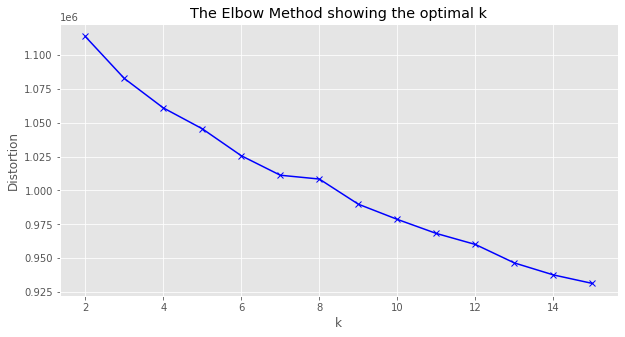

In [515]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [516]:
kl = KneeLocator(range(2, 16), distortions, curve="convex", direction="decreasing")
kl.elbow

9

De acuerdo con los resultados anteriores corremos el modelo con 9 clusters.

In [517]:
kmeanModel = KMeans(n_clusters=9)
kmeanModel.fit(df5)
kmeanModel.inertia_

986730.6770204501

In [518]:
labels5_e=kmeanModel.labels_
labels5_e=pd.DataFrame(labels5_e)

In [519]:
labels5_e = labels5_e.rename(columns={0:'cluster'})

In [520]:
labels5_e.value_counts()

cluster
6          2692
3          2515
7          2115
4          1994
2          1143
1           558
0           472
8           374
5            88
dtype: int64

**PCA**

In [521]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df5)

In [522]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [523]:
final_df = pd.concat([principalDf, labels5_e[['cluster']]], axis = 1)
final_df.head()

principal component 1  principal component 2  cluster
0              -0.663790               4.265317        2
1              -0.814964               1.010121        6
2              -0.922152               1.612385        4
3              -1.228945               0.606302        4
4              -1.458679               3.468216        2

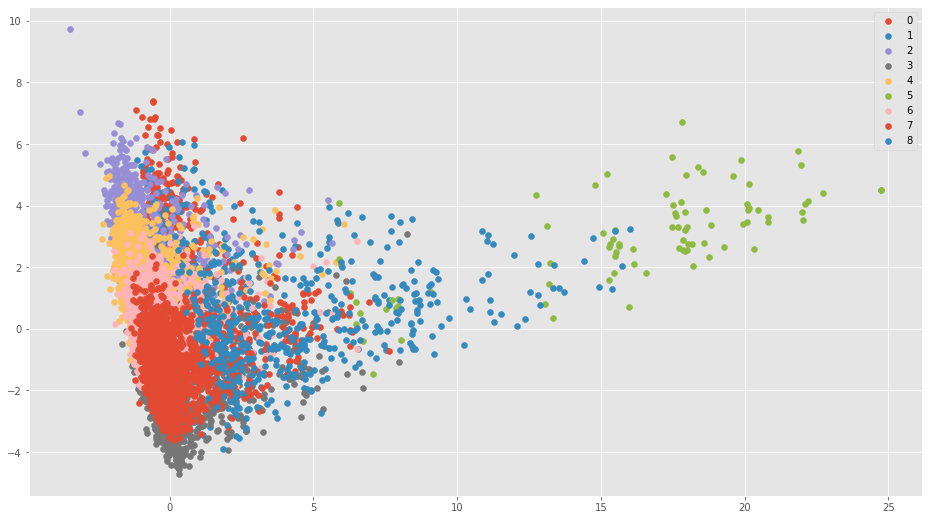

In [524]:
for i in range(9):
    plt.scatter(principalComponents[kmeanModel.labels_==i,0],principalComponents[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()

In [527]:
X = np.array(final_df[['principal component 1','principal component 2']])
y = np.array(final_df['cluster'])
X.shape

(11951, 2)

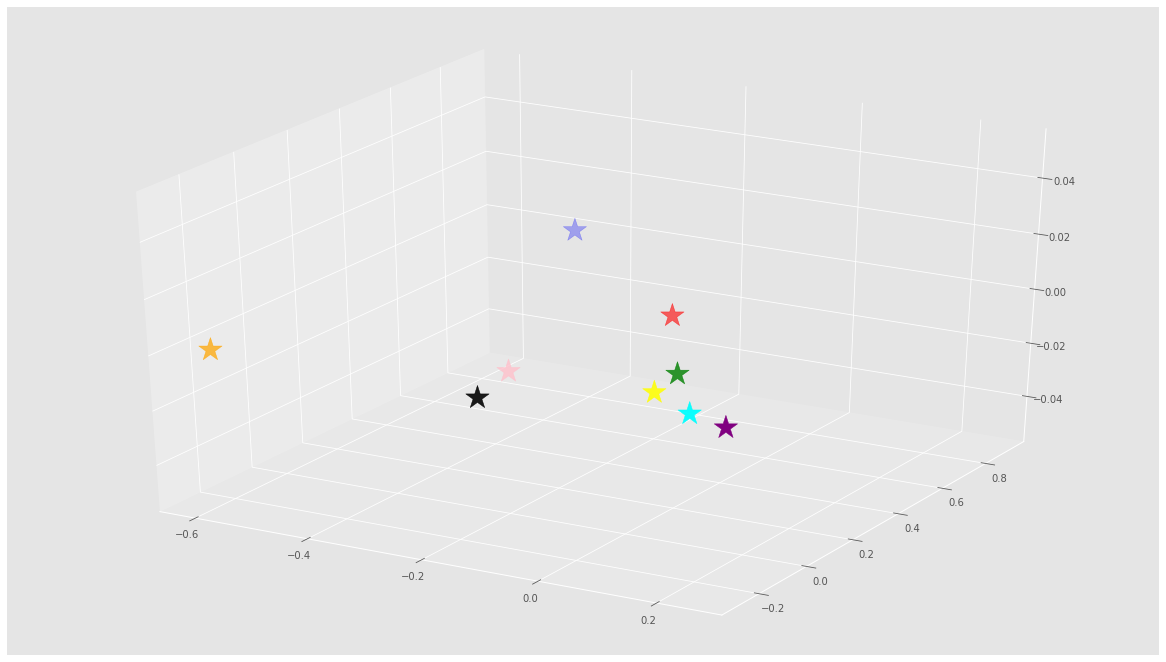

In [531]:
labels = y
# Getting the cluster centers
C = kmeanModel.cluster_centers_
colores=['red','green','blue','cyan','yellow', 'orange', 'pink', 'purple','black']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=600)

**TSNE**

In [525]:
X5e_embedded = TSNE(n_components=2).fit_transform(df5)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


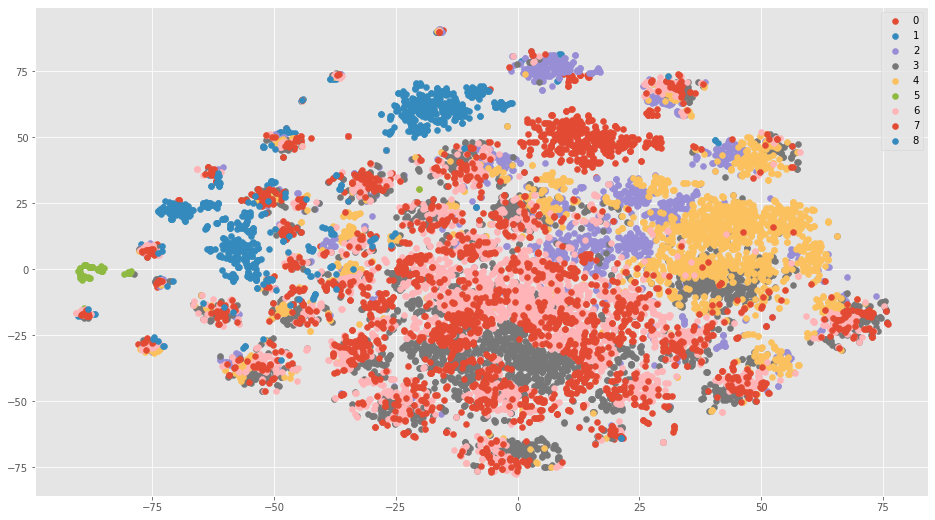

In [526]:
for i in range(9):
    plt.scatter(X5e_embedded[kmeanModel.labels_==i,0],X5e_embedded[kmeanModel.labels_==i,1], label=i)
plt.legend()
plt.show()